# THEORETICAL COMPUTER SCIENCE PROJECT

## 4BIM - S1

In [1]:
%matplotlib inline

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
import itertools
from networkx.drawing.nx_agraph import graphviz_layout
from __future__ import division 
import collections
from networkx.algorithms.richclub import rich_club_coefficient 
import seaborn as sns 
import random 



In [3]:
def rich_club(G, normalized, N):
    '''rich_club compute the non-normalized rich-club coefficient, if normalized == False,
     or the normalized one in the opposite case.
     rich_club returns a graph with the rich_club coefficients infer from data (red points), and
     rich_club coefficients infer from  random data (black points); the number of random dataset is definined by N'''
    G.remove_edges_from(G.selfloop_edges())
    
    if normalized == False :
        RC1 = rich_club_coefficient(G.to_undirected(), normalized=False)
        G_title = 'Non-normalized rich cub coefficient'
        norm = False
    else :
        
        RC1 = rich_club_coefficient(G.to_undirected(), normalized=True)
        G_title = 'Normalized rich cub coefficient'
        norm = True
        
    for i in range(N):
        e1 = []
        e2 = []
        for e in G.edges():
            e1.append(e[0])
            e2.append(e[1])
        random.shuffle(e2) 
        random_graph= nx.Graph()
        random_graph.add_edges_from([(e1[i],e2[i]) for i in range(len(e1))])
        random_graph.remove_edges_from(random_graph.selfloop_edges())
        
        random_RC  = rich_club_coefficient(random_graph.to_undirected(), normalized=norm)
            
        ax1 = sns.scatterplot(random_RC.keys(), random_RC.values(), color='black')
    ax1 = sns.scatterplot(RC1.keys(), RC1.values(), color= 'red')    
    ax1.set_title(G_title)
    ax1.set_ylabel('rich club coeff. r(k)')            
    ax1.set_xlabel('k')
                
  #  return RC1

In [4]:
def Hist_degree(G, Type):
    e1 = []
    e2 = []
    for e in G.edges():
        e1.append(e[0])
        e2.append(e[1])
    random.shuffle(e2) 
    random_graph= nx.DiGraph()
    random_graph.add_edges_from([(e1[i],e2[i]) for i in range(len(e1))])
    if Type == 'out':
        out_list =[]
        out_list_r = []
        for elmt in G.out_degree:
            out_list.append(elmt[1])
            
        for relmt in random_graph.out_degree : 
            out_list_r.append(relmt[1])
        x1 = pd.Series(out_list)
        x2 = pd.Series(out_list_r)
        newbins = np.arange(min(x1), max(x1), 1)
        plt.hist(x1, density=True, bins = newbins,alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins, alpha=0.3, color='red')
        plt.title('Out degree distribution')
        plt.xlabel('out degree')
        plt.ylabel('density')
        
    if Type == 'in':
        in_list =[]
        in_list_r = []
        for elmt in G.in_degree:
            in_list.append(elmt[1])
        for relmt in random_graph.in_degree : 
            in_list_r.append(relmt[1])
        x1 = pd.Series(in_list)
        x2 = pd.Series(in_list_r)
        newbins = np.arange(min(x1), max(x1), 1)
        plt.hist(x1, density=True, bins = newbins,alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins,alpha=0.3, color='red')
        plt.title('In degree distribution')
        plt.xlabel('In degree')
        plt.ylabel('density')
       
        
    if Type == 'both':
        random_graph.to_undirected()
        both_list =[]
        both_list_r =[]
        for elmt in nx.degree(G):
            both_list.append(elmt[1])
        for relmt in random_graph.degree : 
            both_list_r.append(relmt[1])
        x1 = pd.Series(both_list)
        x2 = pd.Series(both_list_r)
        newbins = np.arange(min(x1), max(x1), 1)
        plt.hist(x1, density=True,bins = newbins, alpha=0.5, color = 'grey')
        plt.hist(x2, density=True, bins = newbins,alpha=0.3, color='red')
        plt.title('Degree distribution')
        plt.xlabel('degree')
        plt.ylabel('density')
     
    return x1 , x2

In [5]:
def Betweenness_centrality (G, norm ,K, R ):

    if norm == False :
        BC1 = nx.betweenness_centrality(G, k=K, normalized=norm, endpoints=False)
        G_title = 'Non-normalized betweenness centrality distribution'
        
    else :
        BC1 = nx.betweenness_centrality(G, k=K, normalized=norm, endpoints=False)
        G_title = 'Normalized betweenness centrality distribution'
    BC0 = BC1.values()
    bc =[]
    for i in BC0 :
        if i > 0:
            bc.append(i)
    plt.figure()
    ax = sns.distplot(bc)
    plt.show()
        
    if R == True: # We compute betweenness centrality for random graph
        e1 = []
        e2 = []
        for e in G.edges():
            e1.append(e[0])
            e2.append(e[1])
        random.shuffle(e2) 
        random_graph= nx.Graph()
        random_graph.add_edges_from([(e1[i],e2[i]) for i in range(len(e1))])    
        random_BC  = nx.betweenness_centrality(random_graph, k=K, normalized=norm, endpoints=False)
        
        x = np.arange(len(BC1.values()))
        plt.figure()
        ax1 = sns.scatterplot( x,random_BC.values() , color='black')
        ax1 = sns.scatterplot(x,BC1.values(), color= 'red') 
        ax1.set_title(G_title)
        ax1.set_ylabel('Betweenness centrality')            
        ax1.set_xlabel('vertex')
        plt.show()
        return BC1, random_BC
   
    else :
        x = np.arange(len(BC1.values()))
        plt.figure()
        ax1 = sns.scatterplot(x,BC1.values(), color= 'red') 
        ax1.set_title(G_title)
        ax1.set_ylabel('Betweenness centrality')            
        ax1.set_xlabel('vertex')
        plt.show()
        return BC1
    # Distribution of betweenness centrality of the netkork G ommiting nodes with 0 betweenness centrality
  
    
    

In [53]:
def kshell (G, k):
    s = []
    c = []
    degrees = [(node,val) for (node, val) in G.degree()]
    for elmt in degrees :
        
        if elmt[1] <= k:
            
            s.append(elmt[0])
        else :
            
            c.append(elmt[0])
     
    return G.subgraph(s), G.subgraph(c), s, c
        

## Exercice 1

### Load dataset

In [7]:
edges = pd.read_csv('GRN_edges_S_cerevisiae.txt')# load the nodes labels from GRN_edges_S_cerevisiae.txt
edges = edges.set_index('Unnamed: 0') # set index with first column

In [8]:
#edges

In [9]:
transcription_factors_id = pd.read_csv('net4_transcription_factors.tsv')

In [10]:
transcription_factors_id[1:10]

,transcription_factor
1,G2
2,G3
3,G4
4,G5
5,G6
6,G7
7,G8
8,G9
9,G10


In [11]:
genes_id = pd.read_csv('net4_gene_ids.tsv', sep ='\t')

In [12]:
genes_id[1:10]

,ID,Name
1,G2,YER109C
2,G3,YDR496C
3,G4,YBR098W
4,G5,YNL139C
5,G6,YDR303C
6,G7,YGR063C
7,G8,YER051W
8,G9,YBR150C
9,G10,YIL128W


In [13]:
gene_go_mapping = pd.read_csv('go_slim_mapping.tab.txt', sep='\t', header=None)

In [14]:
gene_go_mapping[1:10]


,0,1,2,3,4,5,6
1,HRA1,HRA1,S000119380,F,molecular_function,GO:0003674,ncRNA_gene
2,HRA1,HRA1,S000119380,P,rRNA processing,GO:0006364,ncRNA_gene
3,HRA1,HRA1,S000119380,P,ribosomal small subunit biogenesis,GO:0042274,ncRNA_gene
4,ICR1,ICR1,S000132612,C,nucleus,GO:0005634,ncRNA_gene
5,ICR1,ICR1,S000132612,F,molecular_function,GO:0003674,ncRNA_gene
6,ICR1,ICR1,S000132612,P,transcription from RNA polymerase II promoter,GO:0006366,ncRNA_gene
7,LSR1,LSR1,S000006478,C,nucleus,GO:0005634,snRNA_gene
8,LSR1,LSR1,S000006478,F,RNA binding,GO:0003723,snRNA_gene
9,LSR1,LSR1,S000006478,P,RNA splicing,GO:0008380,snRNA_gene


In [15]:
gene_go_mapping = gene_go_mapping.drop(gene_go_mapping.columns[[1, 2, 3, 4,6]], axis=1) # keeping columns 0 and 5 only

In [16]:
gene_go_mapping[1:10]

,0,5
1,HRA1,GO:0003674
2,HRA1,GO:0006364
3,HRA1,GO:0042274
4,ICR1,GO:0005634
5,ICR1,GO:0003674
6,ICR1,GO:0006366
7,LSR1,GO:0005634
8,LSR1,GO:0003723
9,LSR1,GO:0008380


### NetworkX graph instance

In [17]:
#G=nx.from_pandas_dataframe(df, 'input', 'output', 'weight') # an undirected graph in python 2.7
# creating a directed graph (raccourci)
DG=nx.from_pandas_edgelist(edges.iloc[0:40,:], 'transcription_factor', 'target_gene', create_using= nx.DiGraph() ) #python3

In [18]:
DG.nodes

NodeView(('G27', 'G25', 'G22', 'G23', 'G20', 'G21', 'G29', 'G41', 'G68', 'G45', 'G61', 'G101', 'G1', 'G109', 'G95', 'G9', 'G121', 'G254', 'G273', 'G168', 'G319', 'G211', 'G212', 'G98', 'G30', 'G138', 'G76', 'G19', 'G15', 'G14', 'G13', 'G12', 'G11', 'G139', 'G112', 'G111', 'G224', 'G87'))

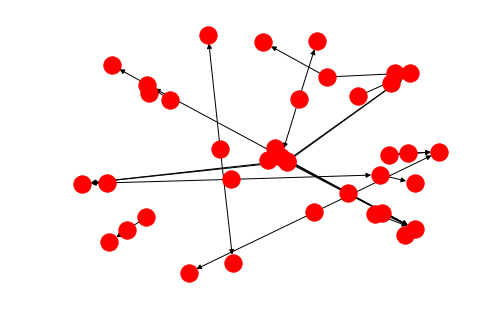

In [19]:
nx.draw(DG)

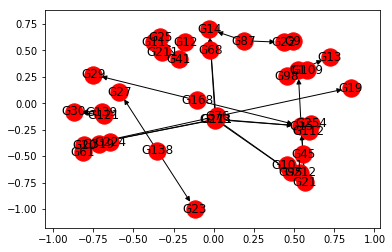

In [20]:
nx.draw_networkx(DG, with_labels=True) # pour faire des graphes plus jolis (à explorer)

### Graph of the transcription factors ids and gene ids

In [21]:
edges[1:10]

,transcription_factor,target_gene
Unnamed: 0,,
1,G98,G1
2,G109,G1
3,G22,G9
4,G211,G11
5,G41,G12
6,G1,G13
7,G68,G14
8,G87,G14
9,G111,G14


In [22]:
edges['target_gene'][0] == genes_id['ID'][0]

True

In [23]:
################# ESSAI qui NE MARCHE PAS ##########################
'''
genes_name_edges = []
for x in edges['target_gene'] :
    i=0
    print('x=', x)
    y = genes_id['ID'][i] # first gene ID in genes_id
    while y != x:
        i+=1
        y=genes_id['ID'][i]
        print('y=', y)
    if i==0:
        genes_name_edges.append(genes_id['Name'][0])
    else :
        genes_name_edges.append(genes_id['Name'][i-1])
    '''

"\ngenes_name_edges = []\nfor x in edges['target_gene'] :\n    i=0\n    print('x=', x)\n    y = genes_id['ID'][i] # first gene ID in genes_id\n    while y != x:\n        i+=1\n        y=genes_id['ID'][i]\n        print('y=', y)\n    if i==0:\n        genes_name_edges.append(genes_id['Name'][0])\n    else :\n        genes_name_edges.append(genes_id['Name'][i-1])\n    "

In [24]:
genes_name_edges = []
y = genes_id['ID'] # list of genes ID
for x in edges['target_gene'] :
    i = list(y[y==x].index)[0] # index of the gene 'x' in the list of gene IDs
    genes_name_edges.append(genes_id['Name'][i])
    

In [25]:
named_edges = edges.copy()
named_edges = named_edges.assign(target_name = genes_name_edges)
named_edges = named_edges.drop(named_edges.columns[[1]], axis=1)

In [26]:
named_edges[1:10]

,transcription_factor,target_name
Unnamed: 0,,
1,G98,YHR084W
2,G109,YHR084W
3,G22,YBR150C
4,G211,YGL071W
5,G41,YLR223C
6,G1,YPL048W
7,G68,YPR065W
8,G87,YPR065W
9,G111,YPR065W


In [27]:
# Directed graph
DG2=nx.from_pandas_edgelist(named_edges.iloc[0:40,:], 'transcription_factor', 'target_name', create_using= nx.DiGraph() ) #python3

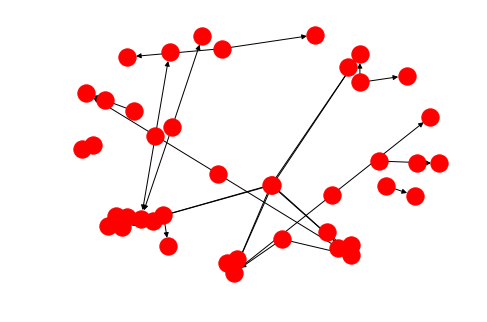

In [28]:
nx.draw(DG2)

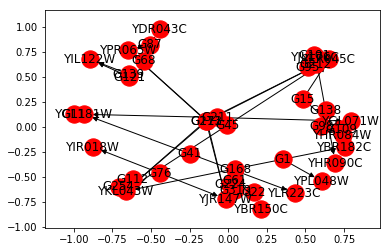

In [29]:
nx.draw_networkx(DG2, with_labels=True)

Remarque : Si les "transcription factors" sont les même gènes que les "target_genes" alors il faudra refaire ce processus sur les "transcription factors" ( pour avoir leur nom à eux aussi). En outre, il faudra refaire un graphe (puisque dans ce cas certains noeuds pourront à la fois avoir des flèches en "entrée" et en "sortie").( Ou alors on pourra tout simplement garder le premier graphe qui contient les ID au lieu des noms).

Dans le cas contraire, je pense qu'il faudra alors laisser comme ça pour distinguer les "transcription factors" des "target genes".  

## Metrics 

In [30]:
DG3=nx.from_pandas_edgelist(edges, 'transcription_factor', 'target_gene', create_using= nx.DiGraph() ) #python3
len(DG3.edges())


3940

### Degree distribution

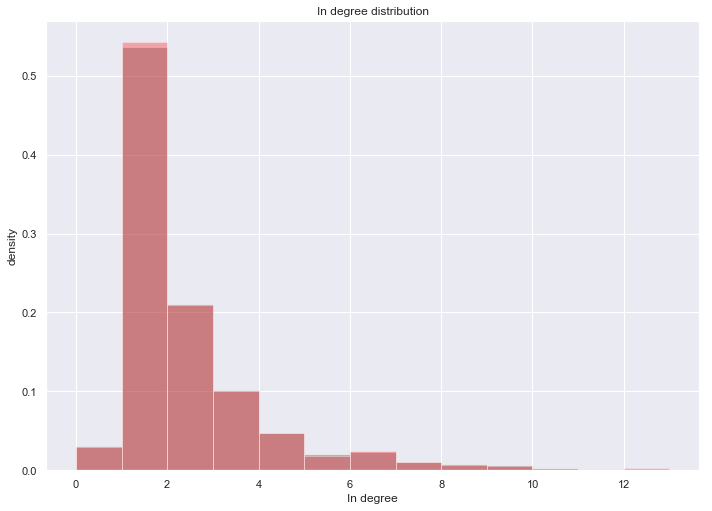

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
H = Hist_degree(DG3, 'in')

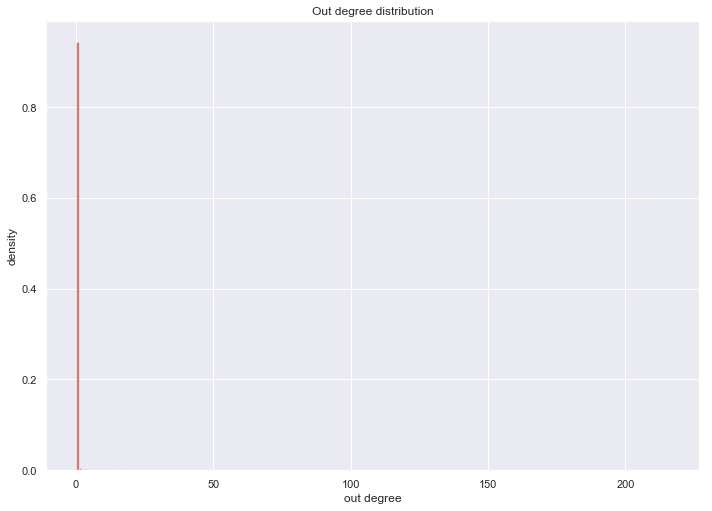

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
H = Hist_degree(DG3, 'out')


In [33]:
H0 = H[0]
H1 = H[1]
H0 = H0[H0!=0]
H1 = H1[H1!=0]
newbins = np.arange(min(H0), max(H0), 2)


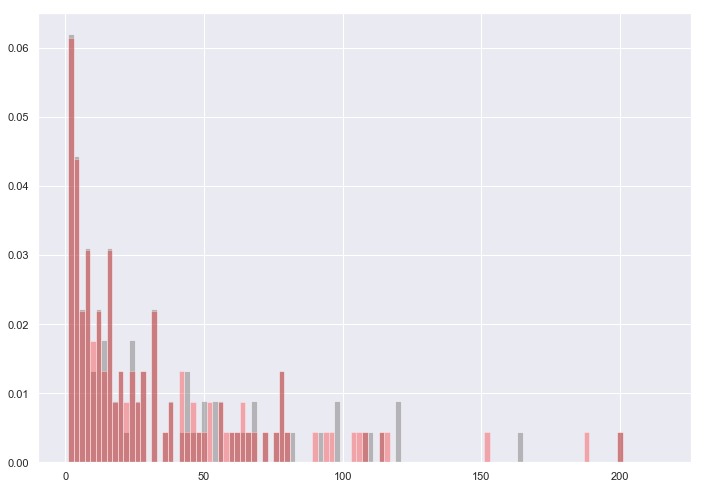

In [34]:
P =plt.hist(H0, density=True, bins = newbins,alpha=0.5, color = 'grey')
P = plt.hist(H1, density=True, bins = newbins,alpha=0.3, color='red')

In [35]:
# A recentrer

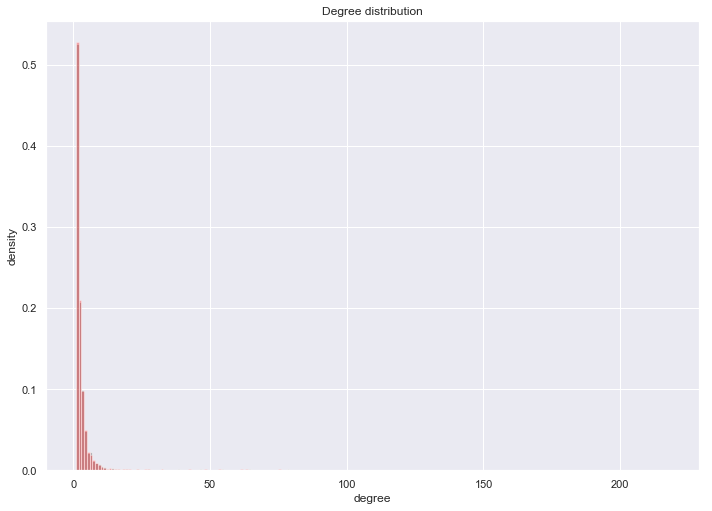

In [36]:
H= Hist_degree(DG3, 'both')

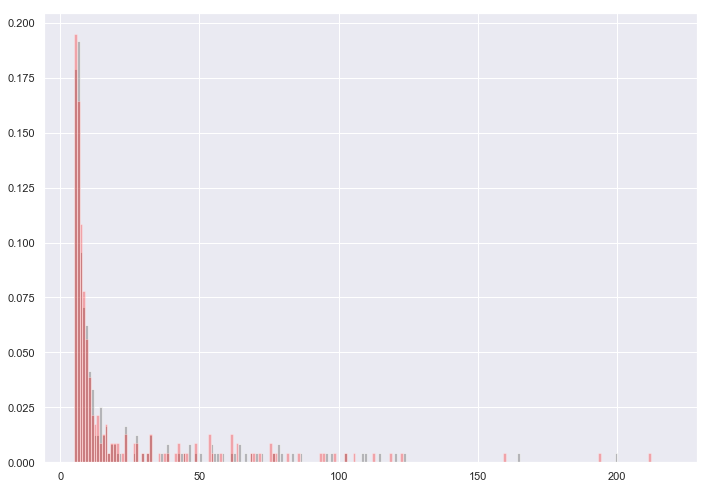

In [37]:
H0 = H[0]
H1 = H[1]
H0 = H0[(5 <= H0)]
H1 = H1[(5 <= H1)]

newbins = np.arange(min(H0), max(H0), 1)
P =plt.hist(H0, density=True, bins = newbins,alpha=0.5, color = 'grey')
P = plt.hist(H1, density=True, bins = newbins,alpha=0.3, color='red')

In [38]:
# A recentrer

### Rich-club coefficient

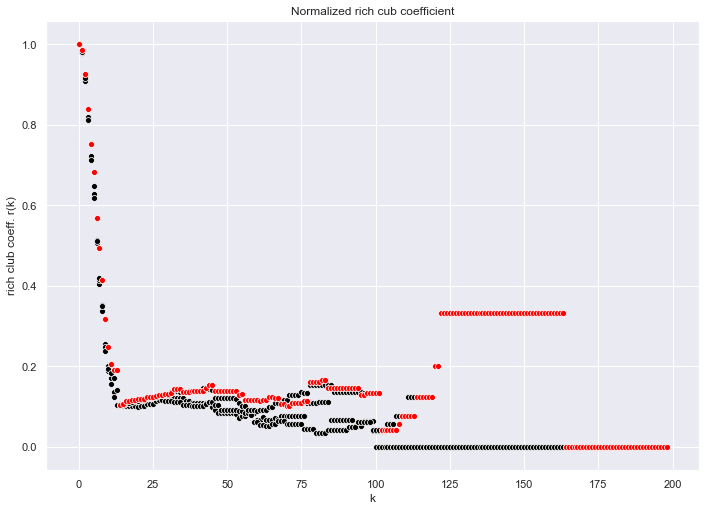

In [39]:
rich_club(DG3, True , 3)

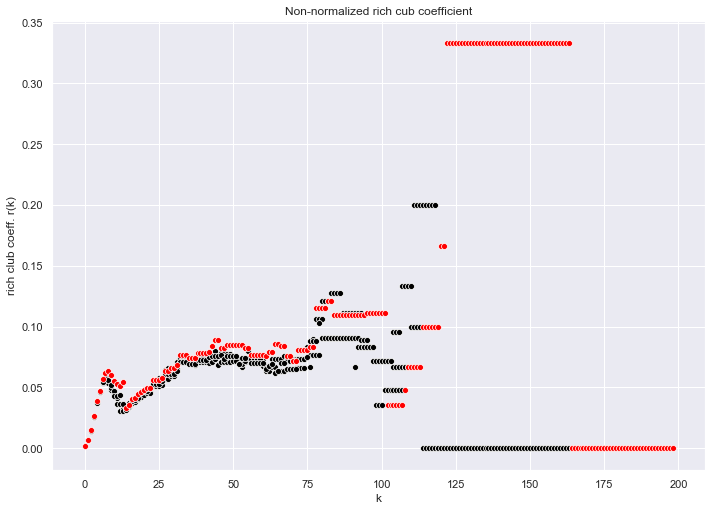

In [40]:
rich_club(DG3, False , 3)

### Betweenness centrality

/Users/mathian/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


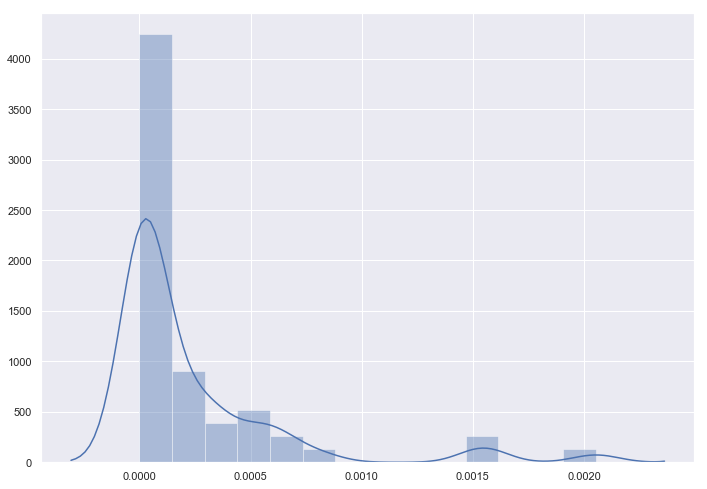

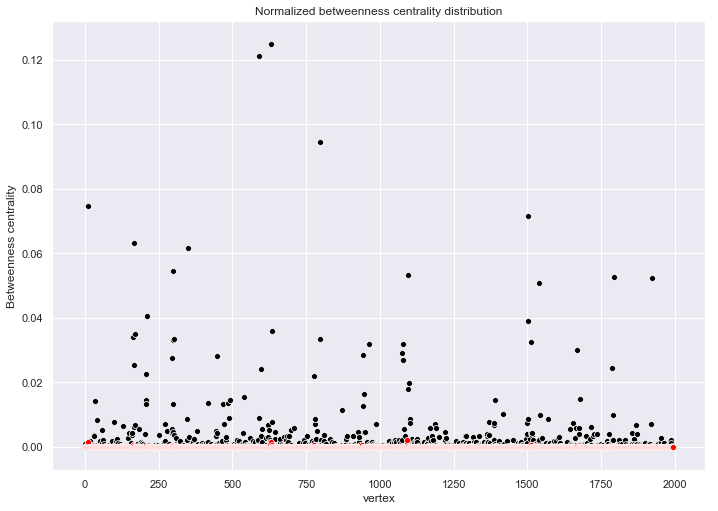

In [41]:
BC = Betweenness_centrality (DG3, True , None ,1 )

Text(0.5,0,'vertex')

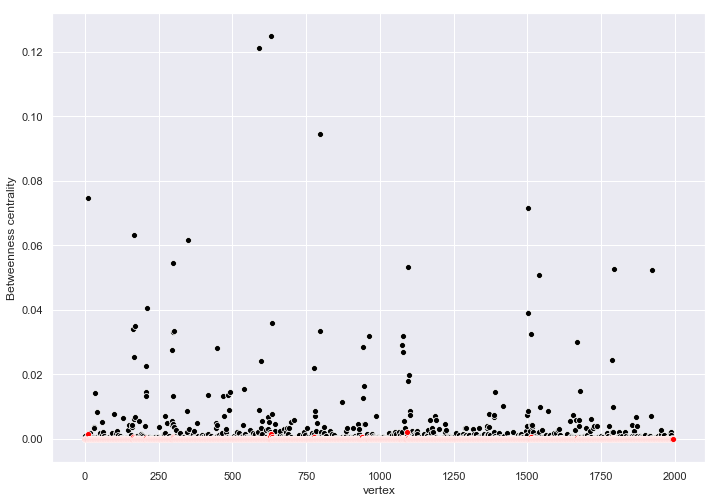

In [42]:
BC[0]
BC[0].values()
x = np.arange(len(BC[0].values()))
ax1 = sns.scatterplot( x,BC[1].values() , color='black')
ax1 = sns.scatterplot(x,BC[0].values(), color= 'red')    

ax1.set_ylabel('Betweenness centrality')            
ax1.set_xlabel('vertex')



<type 'list'>


(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

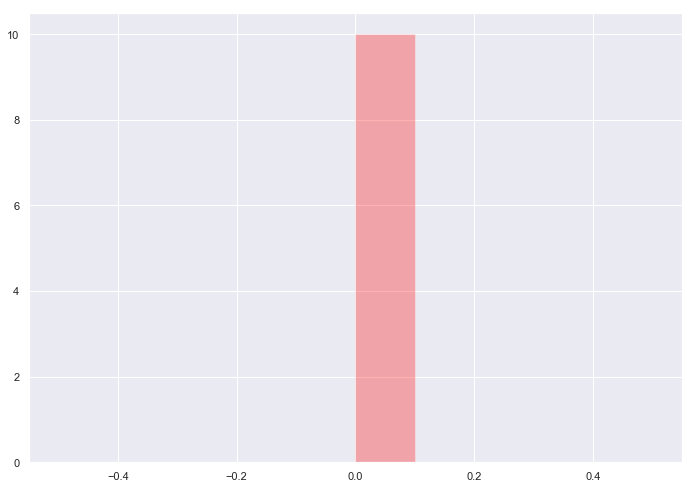

In [43]:
#BC0 = BC[0].values()
#print(type(BC0))
#BC0 = BC0[BC0!=0]
#plt.hist(BC0, density=True,  alpha=0.3, color='red')

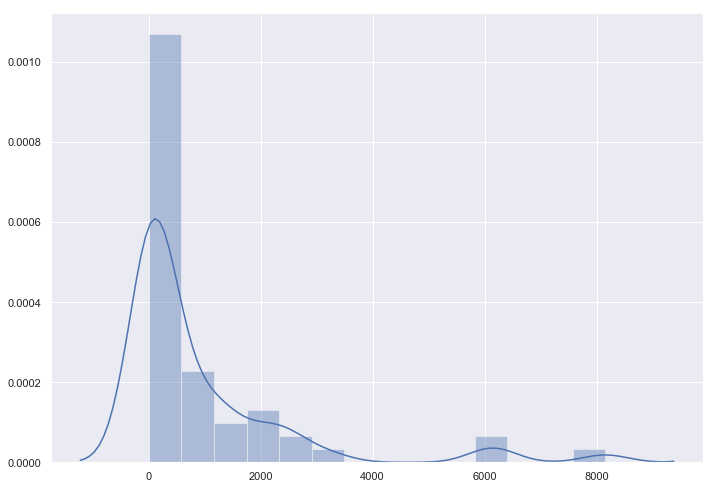

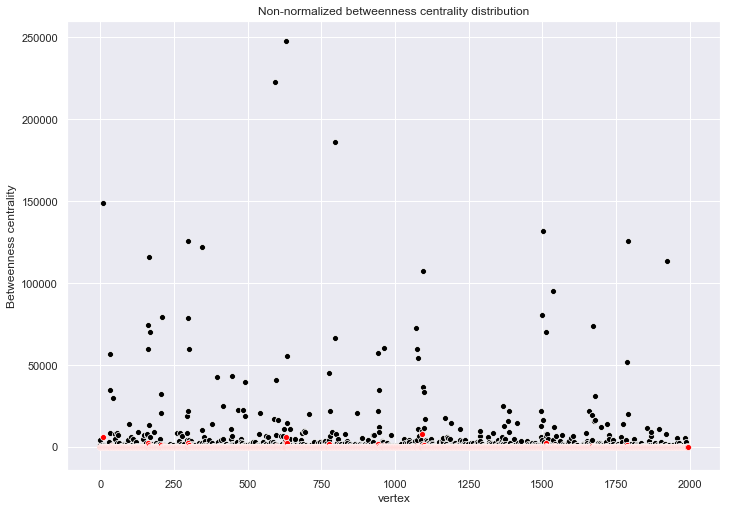

In [44]:
BC = Betweenness_centrality (DG3, False , None ,1 )

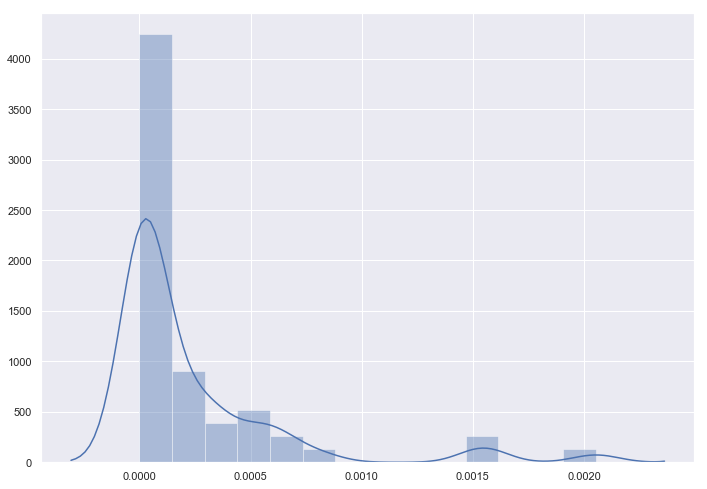

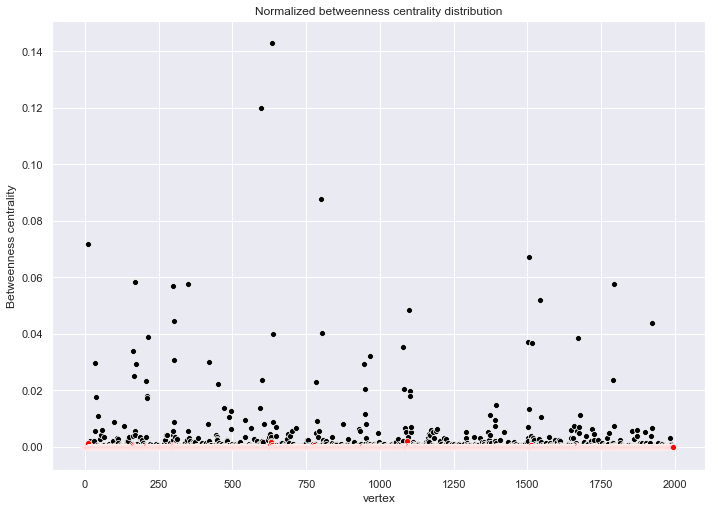

In [47]:
B = Betweenness_centrality (DG3, True, None, True )

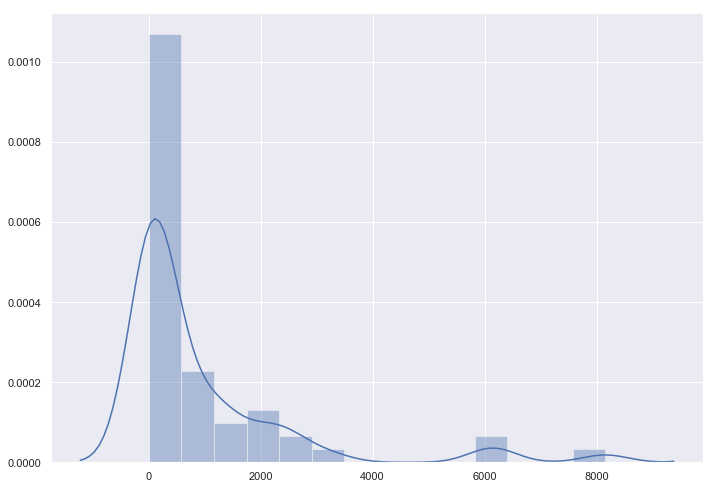

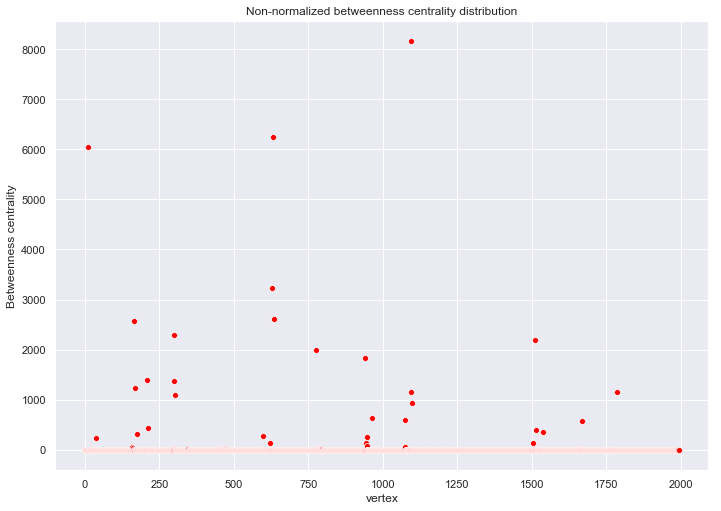

In [48]:
B = Betweenness_centrality (DG3, False , None, False )

## K_shell

In [55]:
KS3 = kshell(DG3, 3)

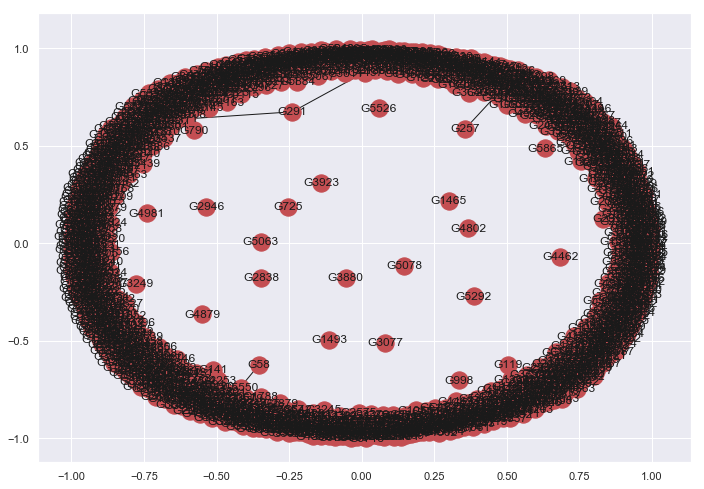

In [56]:
nx.draw_networkx(KS3[0])